# TM10007 Assignment template

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [2]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from worcliver.load_data import load_data
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.feature_selection import SelectFromModel, VarianceThreshold
from sklearn.linear_model import LogisticRegression, Lasso 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.pipeline import Pipeline
from sklearn import svm
from scipy.stats import normaltest
from sklearn.decomposition import PCA




The number of samples: 186
The number of features: 493
The number of malignant samples: 94
The number of benign samples: 92


[Text(0.5, 1.0, 'Voorbeeld grafiek om te inspecteren hoe de data is verdeeld')]

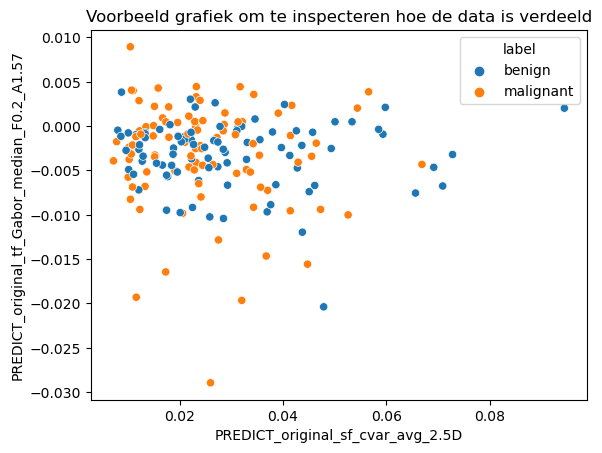

In [3]:
# Data loading functions. Uncomment the one you want to use

data = load_data()

# De label kolom even uit de dataset halen
X = data.drop('label', axis=1)   # drop the label category
y = data['label']                # Target variable die we proberen te voorspellen met het algoritme

# Make a list of feature names
feature_names = list(X.columns)

n_samples = len(data.index)
n_features = len(X.columns)
print(f'The number of samples: {n_samples}')
print(f'The number of features: {n_features}')

n_malignant = len(y[y=='malignant'])
n_benign = len(y[y=='benign'])
print(f'The number of malignant samples: {n_malignant}')
print(f"The number of benign samples: {n_benign}")

sb.scatterplot(x =feature_names[8], y = feature_names[340], data=data, hue= "label").set(title="Voorbeeld grafiek om te inspecteren hoe de data is verdeeld")

### Deleting incomplete features and patients

In [4]:
nullen = X.eq(0.0).sum()
alle_nullen = sum(nullen)
print(f'Aantal nullen in de data: {alle_nullen}') 


patient0={}
for patients in X.index:
    zero_count1 = (X.loc[patients]==0.0).sum()
    patient0[patients]=zero_count1

print(f"Hoeveelheid nullen per patient: {patient0}")

features0={}
for features in X.columns:
    zero_count2 = (X[features]==0).sum()
    features0[features]=zero_count2

features0 = {feature: count for feature, count in features0.items() if count!=0} #om alle volledige rijen, met 0 zeros eruit te halen. Vooral voor overzicht voor onszelf. 

print(f"Hoeveelheid nullen per feature: {features0}")

cutoff_feature = 0.7*n_samples
#cutoff_sample = 0.9*n_features

X_drop = X[:]
Y_drop = y[:]

for feature, counts in features0.items():
    if counts >= cutoff_feature:
        X_drop = X_drop.drop(feature, axis=1)

# for patient, count in patient0.items():
#     if count >= cutoff_sample:
#         X_drop = X_drop.drop(patient, axis=0)
#         Y_drop = Y_drop.drop(patient, axis=0)
            
print(f"Dimensies dataframe na verwijderen unrelevant features {X_drop.shape}")



Aantal nullen in de data: 4341
Hoeveelheid nullen per patient: {'Liver-001_0': 25, 'Liver-002_0': 22, 'Liver-003_0': 22, 'Liver-004_0': 25, 'Liver-005_0': 22, 'Liver-006_0': 22, 'Liver-007_0': 25, 'Liver-008_0': 23, 'Liver-009_0': 25, 'Liver-010_0': 21, 'Liver-011_0': 25, 'Liver-012_0': 25, 'Liver-013_0': 24, 'Liver-014_0': 24, 'Liver-015_0': 23, 'Liver-016_0': 24, 'Liver-017_0': 22, 'Liver-018_0': 15, 'Liver-019_0': 22, 'Liver-020_0': 24, 'Liver-021_0': 22, 'Liver-022_0': 23, 'Liver-023_0': 25, 'Liver-024_0': 24, 'Liver-025_0': 27, 'Liver-026_0': 24, 'Liver-027_0': 24, 'Liver-028_0': 23, 'Liver-029_0': 23, 'Liver-030_0': 24, 'Liver-031_0': 24, 'Liver-032_0': 23, 'Liver-033_0': 24, 'Liver-034_0': 24, 'Liver-035_0': 23, 'Liver-036_0': 27, 'Liver-037_0': 24, 'Liver-038_0': 25, 'Liver-039_0': 24, 'Liver-040_0': 24, 'Liver-041_0': 18, 'Liver-042_0': 21, 'Liver-043_0': 26, 'Liver-044_0': 21, 'Liver-045_0': 24, 'Liver-046_0': 24, 'Liver-047_0': 25, 'Liver-048_0': 22, 'Liver-049_0': 25, 'Live

### Check normality

In [5]:
## Normality check
# P-waarde berekenen voor elke feature (statistiek test om te testen of H0: Data is normaal verdeeld)
p_values = []
for features in X_drop.columns:
    _, p = normaltest(X[features])
    p_values.append(p)

for i, features in enumerate(X_drop.columns):
    print("Variable:", features)
    print("p-value:", p_values[i])
    if p_values[i] < 0.05:
        print("The variable is not normally distributed")
    else:
        print("The variable is normally distributed")

c:\Users\lotte\miniconda3\lib\site-packages\scipy\stats\_stats_py.py:1670: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
c:\Users\lotte\miniconda3\lib\site-packages\scipy\stats\_stats_py.py:1774: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)


Variable: PREDICT_original_sf_compactness_avg_2.5D
p-value: 1.145662534663526e-10
The variable is not normally distributed
Variable: PREDICT_original_sf_compactness_std_2.5D
p-value: 5.082112458342082e-16
The variable is not normally distributed
Variable: PREDICT_original_sf_rad_dist_avg_2.5D
p-value: 4.280298135711637e-06
The variable is not normally distributed
Variable: PREDICT_original_sf_rad_dist_std_2.5D
p-value: 2.4907255505070975e-14
The variable is not normally distributed
Variable: PREDICT_original_sf_roughness_avg_2.5D
p-value: 3.0991062140741755e-09
The variable is not normally distributed
Variable: PREDICT_original_sf_roughness_std_2.5D
p-value: 3.467791393271106e-23
The variable is not normally distributed
Variable: PREDICT_original_sf_convexity_avg_2.5D
p-value: 3.1390583766102673e-26
The variable is not normally distributed
Variable: PREDICT_original_sf_convexity_std_2.5D
p-value: 1.6120456237759444e-28
The variable is not normally distributed
Variable: PREDICT_original

## Splitting data into test and trainingset

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_drop, Y_drop, test_size=0.2, random_state=42)

print("Training set dimensies:", X_train.shape, y_train.shape)
print("Testing set dimensies:", X_test.shape, y_test.shape)


Training set dimensies: (148, 469) (148,)
Testing set dimensies: (38, 469) (38,)


VANAF HIER ALLEEN NOG MAAR DINGEN DOEN OP DE TRAININGSET!!

## Iets doen met de nullen die overbljiven

In [7]:
# Gemiddelde van elke feature berekenen (zonder meenemen 0.0)

# example = {'A': [1, 2, 3, 0],
#         'B': [4, 0, 6, 7],
#         'C': [0, 9, 10, 11],
#         'D': [12, 13, 14, 0]}
# exampledf = pd.DataFrame(example)

# feature_average={}
# print(exampledf)
# #print(X_train["PREDICT_original_sf_compactness_std_2.5D"].mean())

# exampleno0=exampledf[:]
# for feature in exampledf.columns:
#     feature_average[feature] = exampledf[feature][exampledf[feature] != 0.0].mean()
#     exampleno0[feature][exampleno0[feature]==0.0] = feature_average[feature]

# print(feature_average)
# print(exampleno0)


#print(X_no0["PREDICT_original_sf_compactness_std_2.5D"].mean())





## Scaling the data

<bound method NDFrame.head of              PREDICT_original_sf_compactness_avg_2.5D  \
ID                                                      
Liver-124_0                                  0.307960   
Liver-136_0                                 -0.082902   
Liver-151_0                                  0.725236   
Liver-032_0                                 -0.892280   
Liver-013_0                                  0.713333   
...                                               ...   
Liver-107_0                                  0.484233   
Liver-015_0                                  0.106019   
Liver-093_0                                  0.190161   
Liver-180_0                                 -1.980613   
Liver-103_0                                  1.236051   

             PREDICT_original_sf_compactness_std_2.5D  \
ID                                                      
Liver-124_0                                 -0.037199   
Liver-136_0                                  0.263480   


C:\Users\lotte\AppData\Local\Temp\ipykernel_66868\3819181677.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_norm['label'] = y_train.values    #alleen voor het plotten


[Text(0.5, 1.0, 'Voorbeeld grafiek om te inspecteren hoe de data is verdeeld na schalen')]

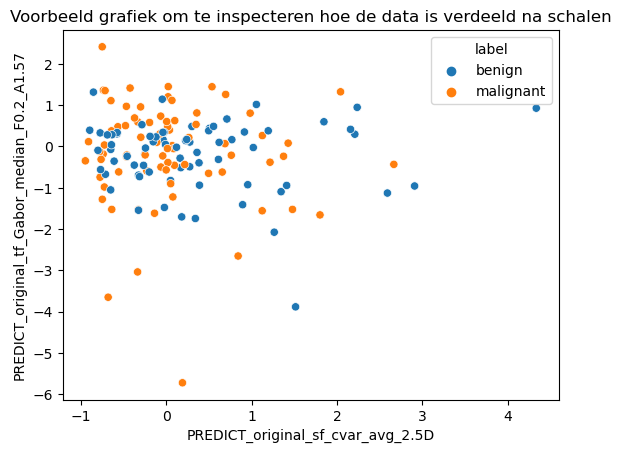

In [8]:
scaler = RobustScaler().fit(X_train) #Dit schaalt de data
X_train_normalized = scaler.transform(X_train)

#X_test_normalized = Schaler.transform(X_test)
X_train_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns, index=X_train.index) #de normalized functie zorgt voor een numpy array, dus moet weer even teruggezet worden in een dataframe. 
#X_test_normalized = pd.DataFrame(X_test_normalized, columns=X_test.columns)

print(X_train_normalized.head)
# Plotten om te zien hoe het er nu uitziet: 
X_train_norm = X_train_normalized[:]     #alleen voor het plotten
X_train_norm['label'] = y_train.values    #alleen voor het plotten
sb.scatterplot(data=X_train_norm, x=feature_names[8], y=feature_names[340], hue='label').set(title="Voorbeeld grafiek om te inspecteren hoe de data is verdeeld na schalen")



## Feature selection

In [9]:
# Feature selection using logistic regression
logistic = LogisticRegression(C=1, penalty='l1', solver='liblinear', random_state=7)

model = SelectFromModel(logistic)
model.fit(X_train_normalized,y_train)
#X_train_selected = model.transform(X_train_normalized)

SF = model.get_support()
X_train_features = X_train_normalized.loc[:,SF]

print(X_train_features.shape)

(148, 89)


## Dimensionality reduction

In [10]:

X_train_pca = PCA().fit_transform(X_train_features)


## Classifier

In [13]:
# KNN classifier

k_values = [i for i in range (1,31)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_pca, y_train, cv=5)
    scores.append(np.mean(score))

# sb.lineplot(x = k_values, y = scores, marker = 'o')
# plt.xlabel("K Values")
# plt.ylabel("Accuracy Score")

# Random forest 

n_value = 100
random_forest = RandomForestClassifier(n_estimators=n_value)
random_forest.fit(X_train_pca, y_train)
#score = cross_val_score(random_forest, X_train_features, y_train, cv=5)
print(f'Random forest score:{np.mean(score)}')

#Linear SVC

linear_svc = svm.SVC(kernel = 'linear', C = 1.0)
linear_svc.fit(X_train_pca, y_train)
#score = cross_val_score(linear_svc, X_train_features, y_train, cv=5)
print(f'Linear SVC score: {np.mean(score)}')


Random forest score:0.628735632183908
Linear SVC score: 0.628735632183908


## Pipeline

In [12]:
# Een voorbeeld van het gebruiken van een pipeline waarbij je meerdere parameters kan testen/optimaliseren

#hier moet C van feature selection denk ik ook nog in. 

preprocessing = [('scaler', RobustScaler()),
                 ('selector', VarianceThreshold()),
                 ('pca', PCA())]

pipe_knn = Pipeline(preprocessing + [('classifier', KNeighborsClassifier())])
pipe_rf = Pipeline(preprocessing + [('classifier', RandomForestClassifier())])
pipe_svc = Pipeline(preprocessing + [('classifier', svm.SVC())])

parameters_knn = {'scaler': [RobustScaler(), MinMaxScaler()], 
                  'selector__threshold': [0, 0.001, 0.01],
                  'pca__n_components': [0.8, 0.9, 0.95],  #we geven hm nu verschillende varianties om uit te kiezen. Idk of dat logisch is?
                  'classifier__n_neighbors': [1, 3, 5, 7, 10],
                  'classifier__p': [1, 2],
                  'classifier__leaf_size': [1, 5, 10, 15]
                 }

parameters_rf = {'scaler': [RobustScaler(), MinMaxScaler()], 
                 'selector__threshold': [0, 0.001, 0.01],
                 'pca__n_components': [0.8, 0.9, 0.95],
                 'classifier__n_estimators': [10, 50, 100]
                }

parameters_svc = {'scaler': [RobustScaler(), MinMaxScaler()], 
                  'selector__threshold': [0, 0.001, 0.01],
                  'pca__n_components': [0.8, 0.9, 0.95],
                  #'classifier__kernel': ['linear', 'rbf'], #deze maakt opeens de runtime echt meeega lang?
                  'classifier__C': [0.1, 1, 10]
                 }

# Grid search waarbij je de optimale parameters gaat zoeken

classifiers = {'knn': (pipe_knn, parameters_knn),
               'Random Forest': (pipe_rf, parameters_rf),
               'SVC': (pipe_svc, parameters_svc)}

for name, (classifier, parameter) in classifiers.items():
    search = RandomizedSearchCV(classifier, parameter, cv=5)
    search.fit(X_train_pca, y_train)
    print(name)
    print("Best hyperparameters: ", search.best_params_)
    print('Training set score: ' + str(search.score(X_train_pca, y_train)))
    #print('Test set score: ' + str(search.score(X_test, y_test)))

# best_pipe = grid.best_estimator_
# print(best_pipe)

knn
Best hyperparameters:  {'selector__threshold': 0.01, 'scaler': RobustScaler(), 'pca__n_components': 0.9, 'classifier__p': 2, 'classifier__n_neighbors': 10, 'classifier__leaf_size': 10}
Training set score: 0.581081081081081
Random Forest
Best hyperparameters:  {'selector__threshold': 0.001, 'scaler': RobustScaler(), 'pca__n_components': 0.9, 'classifier__n_estimators': 10}
Training set score: 0.8175675675675675
SVC
Best hyperparameters:  {'selector__threshold': 0.001, 'scaler': MinMaxScaler(), 'pca__n_components': 0.95, 'classifier__C': 10}
Training set score: 1.0


## Plotjes

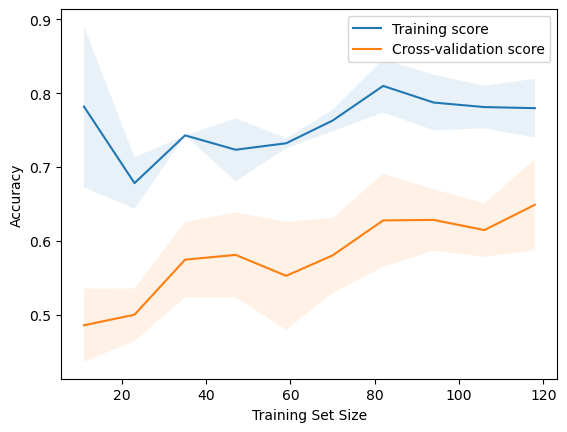

In [14]:
### Learning curves:

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    pipe_knn, X_train_pca, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


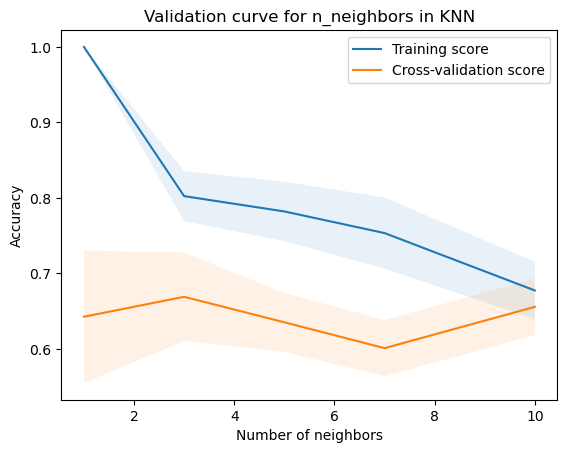

In [16]:
from sklearn.model_selection import validation_curve

## KNN for n_neighbors plot

param_range = [1, 3, 5, 7, 10]
train_scores, test_scores = validation_curve(
    pipe_knn, X_train_pca, y_train, param_name='classifier__n_neighbors', param_range=param_range, cv=5, n_jobs=-1, scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, label='Training score')
plt.plot(param_range, test_mean, label='Cross-validation score')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.title('Validation curve for n_neighbors in KNN')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##
